In [109]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## The full dataset (CoreMOF + AnionPillared)

In [110]:
dirname1 = "dataset/CoREMOF2019-mofdb-version-dc8a0295db/"
dirname2 = "dataset/Anion-pillared_MOFdataset/Database/"


nb_atoms = np.zeros((len(os.listdir(dirname1))+ len(os.listdir(dirname2))))
nb_atoms_noH = np.zeros((len(os.listdir(dirname1))+ len(os.listdir(dirname2))))
i=0

for files in os.listdir(dirname1):
    if not files.endswith("cif"):
        continue
    with open(dirname1+files, "r") as f:
        
        num_lines = sum(1 for _ in f)
        nb_atoms[i] = num_lines - 25
        if(num_lines-25 < 20):
            print(files, num_lines-25)
                    
        f.seek(0)
        num_lines2 = sum(1 for l in f if "H" not in l)
        nb_atoms_noH[i] = num_lines2 - 24
        #if(num_lines2-24 < 20):
        #    print(files, num_lines2-24)
        i+=1
        if(i%100==0):
            print(i, "  elements")

for files in os.listdir(dirname2):
    if not files.endswith("cif"):
        continue
    with open(dirname2+files, "r") as f:
        num_lines = sum(1 for _ in f)
        nb_atoms[i] = num_lines - 30

        f.seek(0)
        num_lines = sum(1 for l in f if "H" not in l)
        nb_atoms_noH[i] = num_lines - 29
        
        i+=1
        if(i%100==0):
            print(i, "  elements")


100   elements
200   elements
300   elements
400   elements
500   elements
600   elements
700   elements
800   elements
900   elements
1000   elements
1100   elements
1200   elements
1300   elements
1400   elements
MOCJEU_clean.cif 17
1500   elements
1600   elements
1700   elements
1800   elements
1900   elements
2000   elements
MOCJAQ_clean.cif 17
2100   elements
2200   elements
2300   elements
KAHPUE_clean.cif 19
2400   elements
2500   elements
GISZUD_clean.cif 19
2600   elements
2700   elements
ja4012707_si_004_clean.cif 19
2800   elements
2900   elements
3000   elements
3100   elements
FIGXAU_clean.cif 12
3200   elements
3300   elements
3400   elements
3500   elements
3600   elements
DUXZIG01_clean.cif 19
3700   elements
LUFQUZ02_clean.cif 19
3800   elements
ja4012707_si_003_clean.cif 9
3900   elements
4000   elements
4100   elements
4200   elements
4300   elements
4400   elements
HADPOU_clean.cif 19
4500   elements
CICYIX_clean.cif 15
4600   elements
VECZEI_clean.cif 19
FIVNAZ_cle

In [111]:
len(nb_atoms)
nb_atoms = nb_atoms[nb_atoms > 0]

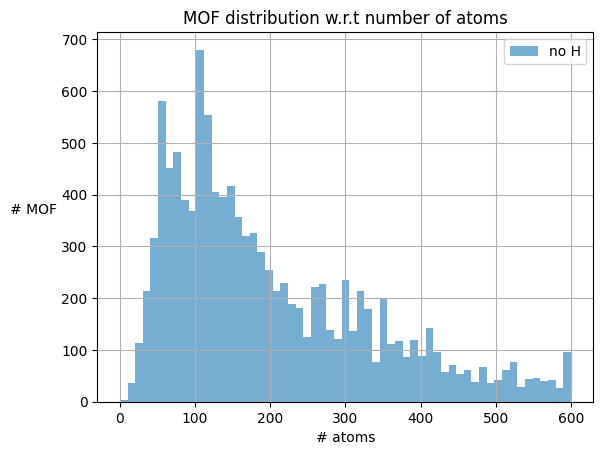

In [112]:
#bins=[1,10,20,30,40,50,60]
bins = np.linspace(0,600,60)
plt.hist(nb_atoms, bins= bins, alpha = 0.6, label = 'no H')

#plt.yscale('log')
plt.title("all dataset")
plt.xlabel("# atoms")
#plt.yscale("log")
plt.ylabel("# MOF",rotation=0,labelpad=20)
plt.title("MOF distribution w.r.t number of atoms")
plt.legend()
plt.grid()
plt.show()

In [113]:
print( len(nb_atoms[nb_atoms < 140])/len(nb_atoms))

0.3817536276628589


## Dataset selection from reference [5]

[5] https://doi.org/10.1038/s42004-023-01009-x

In [114]:

df = pd.read_csv('MOF-CO2/Co2WithVolumetricAtomTypes.csv')
df = df.dropna()

df2 = df.drop_duplicates(['MOF'],keep='first')


In [115]:
print(len(df2))

4243


### extract MOFs with less than 25 atoms (more or less..)

In [116]:
threshold = 25

nb_atoms_dataset = np.zeros(len(df2))
nb_atoms_dataset_noH = np.zeros(len(df2))
error_mof = []
select_mof = []
error=0
i=0
for _, row in df2.iterrows():
    if(row['MOF']+"_clean.cif" in os.listdir(dirname1)):
        with open(dirname1+row['MOF']+"_clean.cif", "r") as f:
            num_lines = sum(1 for _ in f)
            nb_atoms_dataset[i] = num_lines - 24  
            f.seek(0)
            num_lines = sum(1 for l in f if "H" not in l)
            nb_atoms_dataset_noH[i] = num_lines - 23
            if(nb_atoms_dataset[i] < threshold):
                select_mof.append(row['MOF'])
            i+=1
    elif(row['MOF']+"_manual.cif" in os.listdir(dirname1)):
        with open(dirname1+row['MOF']+"_manual.cif", "r") as f:
            num_lines = sum(1 for _ in f)
            nb_atoms_dataset[i] = num_lines - 24  
            f.seek(0)
            num_lines = sum(1 for l in f if "H" not in l)
            nb_atoms_dataset_noH[i] = num_lines - 23
            if(nb_atoms_dataset[i] < threshold):
                select_mof.append(row['MOF'])
            i+=1
                
    elif(row['MOF']+".cif" in os.listdir(dirname2)):
        with open(dirname2+row['MOF']+".cif", "r") as f:
            num_lines = sum(1 for _ in f)
            nb_atoms_dataset[i] = num_lines - 30  
            f.seek(0)
            num_lines = sum(1 for l in f if "H" not in l)
            nb_atoms_dataset_noH[i] = num_lines - 29
            if(nb_atoms_dataset[i] < threshold):
                select_mof.append(row['MOF'])
            i+=1
    else:
        error_mof.append(row['MOF'])
        error+=1
        i+=1

print("number of errors: ", error, " out of ", len(df2))
    #break

number of errors:  90  out of  4243


In [117]:
len(select_mof)

38

In [118]:
select_mof

['AHOKIR01',
 'BOHGOU',
 'CICYIX',
 'EBEMEF',
 'FIGXAU',
 'FIGXEY',
 'FIVNAZ',
 'FUTJOV',
 'GISZUD',
 'HAKWUM',
 'IGAHED',
 'KAHPUE',
 'KECRAL10',
 'LIKFOB',
 'LUFQUZ01',
 'LUFQUZ02',
 'LUFQUZ',
 'MOCHES',
 'MOCHIW',
 'MOCHOC',
 'MOCHUI',
 'MOCJAQ',
 'MOCJEU',
 'MOCJIY',
 'NINHOH',
 'NIVWIY',
 'OLOKEF',
 'PIYZAZ',
 'REGJIW',
 'RENWEM01',
 'RONZID',
 'RURPAW',
 'RURPEA',
 'SOBZOY',
 'TILVUF',
 'TILWAM',
 'UHISOU',
 'XOMCIL']

### General statistics

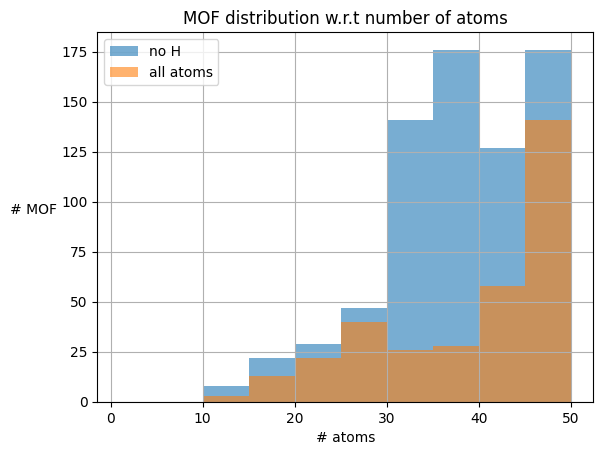

In [119]:
bins=[1,5,10,15,20,25,30,35,40,45,50]

plt.hist(nb_atoms_dataset_noH, bins= bins, alpha = 0.6, label = 'no H')

plt.hist(nb_atoms_dataset,bins = bins, alpha = 0.6,label = 'all atoms') 
plt.xlabel("# atoms")
plt.ylabel("# MOF",rotation=0,labelpad=20)
plt.title("MOF distribution w.r.t number of atoms")
plt.legend()
plt.grid()
plt.show()

In [120]:
df2["num_atoms"] = nb_atoms_dataset

df3 = df2[df2["MOF"].isin(select_mof)]
print(len(df3))


38


/var/folders/mc/x5xnf4550vj96w2b0ps613680000gp/T/ipykernel_2719/3617690160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_atoms"] = nb_atoms_dataset


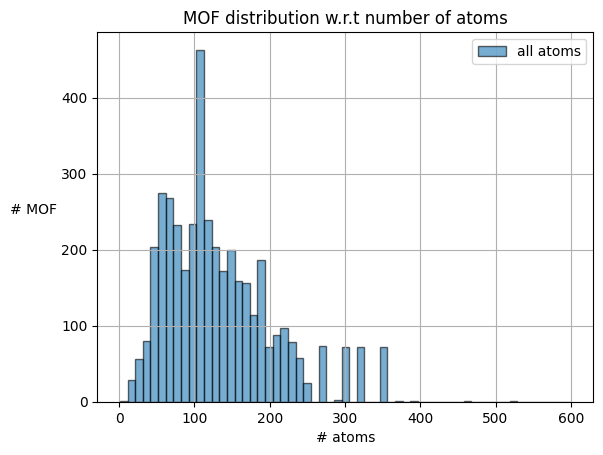

In [121]:
bins=np.linspace(1,600,60)


plt.hist(df2["num_atoms"],bins = bins, alpha = 0.6,edgecolor='black', label = 'all atoms') 
plt.xlabel("# atoms")
#plt.yscale("log")
plt.ylabel("# MOF",rotation=0,labelpad=20)
plt.title("MOF distribution w.r.t number of atoms")
plt.legend()
plt.grid()
plt.show()


In [122]:
print("% MOFs with < 140 atoms\t", len(df2[df2["num_atoms"] < 140])/len(df2))
print("% MOFs with < 60 atoms\t", len(df2[df2["num_atoms"] < 60])/len(df2))

% MOFs with < 140 atoms	 0.6290360593919396
% MOFs with < 60 atoms	 0.16262078717888287


# Complexity study

In [123]:
# Veyr rough complexity functions providing the execution time in hours

# Normalised to Joliot Curie
def complexity_krylov(n, T=2000,K=100, p = 5):
    
    return (n**2 + 2**n + n**(p+2))*T*K /3600/(7*10**15)

def complexity_naive(n, T=2000,K=100):

    return (n**2 + 2**(3*n) + 2**(2*n) + 2**(n))*T*K  /3600/ (7*10**15)

# Quantum algorithm proposed
def complexity_quantum(n, T=2000,K=100, M = 1, tfinal = 15*10**(-6)):

    return M * K * T * (tfinal/2 + 1) * n / 3600


# Complexity of the Vietoris-Rips algorithm (~Cech complex) NOT NORMALISED TO JOLIOT CURIE
# Note that no prefactor is known for now compared to the quantum algo
def complexity_cech(n, T=2000,K=100):
    return n**2 /3600 #/ (7*10**15)

In [124]:
df2["num_atoms"].astype(int)

0        144
3        144
6        144
9        144
12       144
        ... 
12622     64
12625    152
12628     76
12631     82
12634     68
Name: num_atoms, Length: 4243, dtype: int64

In [125]:
df3 = df2[df2['num_atoms'] < 60 ]

print(len(df3))
for idx, row in df3.iterrows():
    #print(int(df3.loc[idx,"num_atoms"]), complexity_delaunay(int(df3.loc[idx,"num_atoms"])))
    df3.loc[idx,'complexity_naive'] = complexity_naive(int(df3.loc[idx,"num_atoms"]))
    df3.loc[idx,'complexity_krylov'] = complexity_krylov(int(df3.loc[idx,"num_atoms"]))
    df3.loc[idx,'complexity_quantum'] = complexity_quantum(int(df3.loc[idx,"num_atoms"]))
    df3.loc[idx,'complexity_cech'] = complexity_cech(int(df3.loc[idx,"num_atoms"]))
    

690


/var/folders/mc/x5xnf4550vj96w2b0ps613680000gp/T/ipykernel_2719/2380860833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[idx,'complexity_naive'] = complexity_naive(int(df3.loc[idx,"num_atoms"]))
/var/folders/mc/x5xnf4550vj96w2b0ps613680000gp/T/ipykernel_2719/2380860833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[idx,'complexity_krylov'] = complexity_krylov(int(df3.loc[idx,"num_atoms"]))
/var/folders/mc/x5xnf4550vj96w2b0ps613680000gp/T/ipykernel_2719/2380860833.py:8: SettingWith

In [126]:
print("naive\t", sum(df3["complexity_naive"]))
print("krylov\t",np.sum(df3['complexity_krylov']))
print("server\t",np.sum(df3['complexity_krylov'])*(7*10**15)/(3*9*10**12))

print("PH\t",np.sum(df3["complexity_cech"]))
print("quantum\t",np.sum(df3["complexity_quantum"]))
complexity_quantum(len(df3) )

naive	 8.424013662704876e+39
krylov	 126916.37759778491
server	 32904246.043870166
PH	 367.49
quantum	 1522789.1986111111


38333.620833333334

Text(0.5, 0, '# atoms')

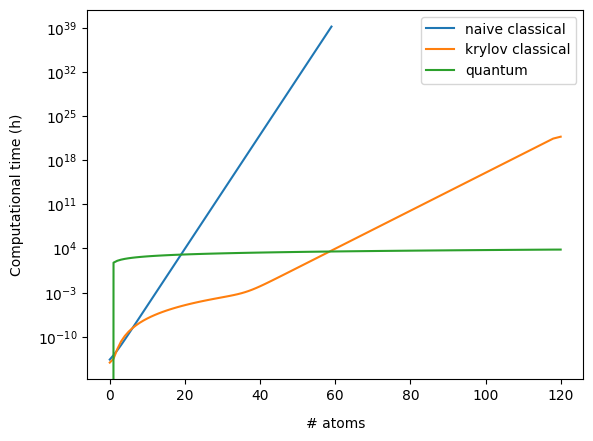

In [127]:
max = 120
x = np.linspace(0,max,max,dtype='int64')


r_n = []
r_k = []
r_q = []
r_d = []

for n in range(max):
    r_n.append(complexity_naive(n))
    r_k.append(complexity_krylov(n))
    r_q.append(complexity_quantum(n) )
    r_d.append(complexity_cech(n) )
    #print("{:.s3g}".format(complexity_naive(n)))

plt.plot(x[:int(max/2)],r_n[:int(max/2)], label = 'naive classical')
plt.plot(x,r_k, label = 'krylov classical')
plt.plot(x,r_q, label = 'quantum')
#plt.plot(x,r_d, label = 'Cech complex')

plt.legend()
plt.yscale('log')
plt.ylabel("Computational time (h)",rotation=90,labelpad=10)
plt.xlabel("# atoms",rotation=0,labelpad=10)